<h1><center>University of Prince Mugrin </center></h1>
<h1><center>College of Computer and Cyber Sciences </center></h1>
<h1><center>Computer Science Department</center></h1>

<h1><center> Final Lab Exam - Machine Learning </center></h1>
<h2><center> Part 1 - 90 Mins </center></h2>
<h2><center>AI 305– Introduction to Machine Learning</center></h2>
<h2><center>Fall 2024</center></h2>
<h2><center>Abubakar Waziri</center></h2>
<h2><center>4220056</center></h2>

##  Instructions
### 1- This exam is closed-book, close notes, close-resource exam ONLY permitted offical documentation is allowed.
   Allowed resource:
   
  https://scikit-learn.org/stable/user_guide.html
   
https://pandas.pydata.org/

https://www.tensorflow.org/api_docs/python/tf
### 2- You can no chat or discuss with someone else inside or outside the class.
### 3- The use of mobile devices (phones or otherwise) is NOT PERMITTED.
### 4- If you think that there is something wrong with any of the questions, attempt it to the best of your understanding.
### 5- Write down all your assumptions and actions.
### 5- Solve the questions on the same notebook and submit it to M.S Teams
### 6- Your additional explanation and comments will be very important in grading.
### 7- Make sure that you don't have any window or tab open which contains "unauthorized" resource

In this exam, you will work with the **Titanic Dataset**, which contains information about passengers aboard the Titanic. The dataset includes features such as age, gender, fare, and the number of family members traveling with each passenger.

The primary goal is to predict whether a passenger survived or not, using different machine learning models and techniques. You will preprocess the data, explore it, and apply various machine learning algorithms to solve the classification problem.


## Question 1: Data loading Preprocessing

In [93]:
#import libraries 

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [97]:
# a. Load the Titanic Dataset 
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
# b. Drop Unnecessary Columns [PassengerId, 'Name', 'Ticket', 'Cabin'] 
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

In [101]:
# c. Fill Missing Values 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/var/folders/pj/k78tnlfd70x2r6r2m3x__yq40000gn/T/ipykernel_5300/3000900628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/pj/k78tnlfd70x2r6r2m3x__yq40000gn/T/ipykernel_5300/3000900628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [103]:
# d. Encode Categorical Variables: convert non-numeric columns (e.g., 'Sex', 'Embarked') 
# into numeric form so they can be used by machine learning models. Hince, one-hot encoding.
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [105]:
# e. Feature & Target Split: Separate the target column ('Survived') from the features (X,Y) 
X = df.drop(columns=['Survived'])
y = df['Survived']

In [107]:
# Show preprocessed data

print("Preprocessed Dataset:")
print(df.head())

Preprocessed Dataset:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## Question 2: Apply ML models

2.1 Prepare data as train and test and then apply the following algorithms:

a- logistice Regression 

b- KNN

c- Decision Tree

d- SVM

2.2 You will apply these algorithms to:

a. predict `Survived` feature 

b. report the `accuracy` result for each model

c. compare its performances. 


In [110]:
# a. Train-Test Split: Splitting data into train and test sets  (train 80% and test 20%) with random state (seed) = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accuracy_results = {}

In [112]:
# b. Apply Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_results['LR'] = accuracy_logistic


print("\nLogistic Regression survied Predictions:")
print(y_pred_logistic[:10]) 


Logistic Regression survied Predictions:
[0 0 0 1 1 1 1 0 1 1]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# c. Apply K-means (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_results['KNN'] = accuracy_knn

# knn predictions
print("\nKNN survied Predictions:")
print(y_pred_knn[:10])


KNN survied Predictions:
[0 0 0 0 0 1 1 0 1 1]


In [116]:
# d. Apply Support Vector Classifier 
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_results['SVM'] = accuracy_svm

# SVM predictions
print("\nSVM survied Predictions:")
print(y_pred_svm[:10])


SVM survied Predictions:
[0 0 0 0 0 1 0 0 0 0]


In [118]:
# Display actual values for comparison
print("\nActual Survived Values:")
print(y_test.values[:5]) # just the first five


Actual Survived Values:
[1 0 0 1 1]


In [120]:
print("accuracy results:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.2f}")

accuracy results:
LR: 0.80
KNN: 0.71
SVM: 0.65


## Question 3 :
a. Compare between the different models show what is the best model for this dataset.


Best performing model: LR with accuracy 0.80


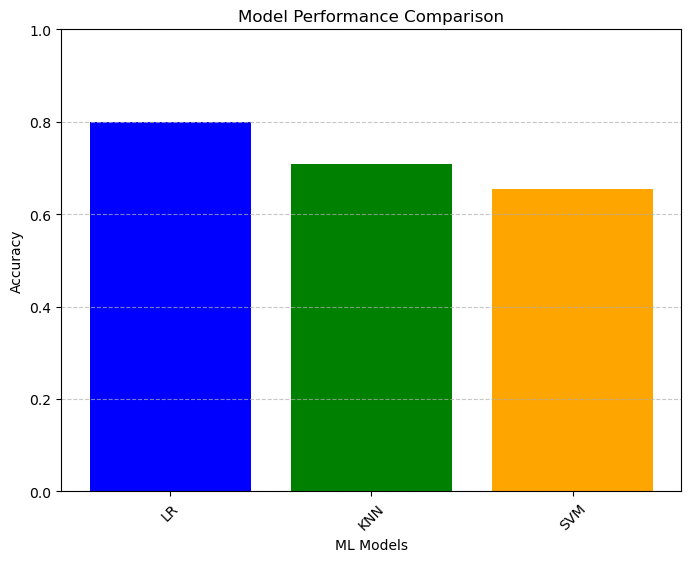

In [123]:
import matplotlib.pyplot as plt

best_model = max(accuracy_results, key=accuracy_results.get)
print(f"\nBest performing model: {best_model} with accuracy {accuracy_results[best_model]:.2f}")

plt.figure(figsize=(8, 6))
model_names = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())


plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1) 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



b. Use different Kernals and parameters for SVM and report the best results

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dictionary to store accuracies for different kernels
svm_results = {}

# Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
svm_results['Linear'] = accuracy_score(y_test, y_pred_linear)
print(svm_results['Linear'])

0.7821229050279329


In [127]:
# RBF Kernel (is the default kernel)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
svm_results['RBF'] = accuracy_score(y_test, y_pred_rbf)
print(svm_results['RBF'])

0.6536312849162011


In [128]:
# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
svm_results['Polynomial'] = accuracy_score(y_test, y_pred_poly)
print(svm_results['Polynomial'])

0.6145251396648045


In [129]:
# Reporting results
print("SVM Kernel Results Report:")
for kernel, accuracy in svm_results.items():
    print(f"{kernel} Kernel: Accuracy = {accuracy:.2f}")

best_kernel = max(svm_results, key=svm_results.get)
print(f"\nBest Kernel: {best_kernel} with Accuracy = {svm_results[best_kernel]:.2f}")

SVM Kernel Results Report:
Linear Kernel: Accuracy = 0.78
RBF Kernel: Accuracy = 0.65
Polynomial Kernel: Accuracy = 0.61

Best Kernel: Linear with Accuracy = 0.78


## Question 4: Apply princpal component analysis PCA 

Apply PCA to reduce features to 2 components.

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# a. Apply PCA (2 Components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [137]:
# b. how much variance each principal component explains in the data.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.93542926 0.06357769]


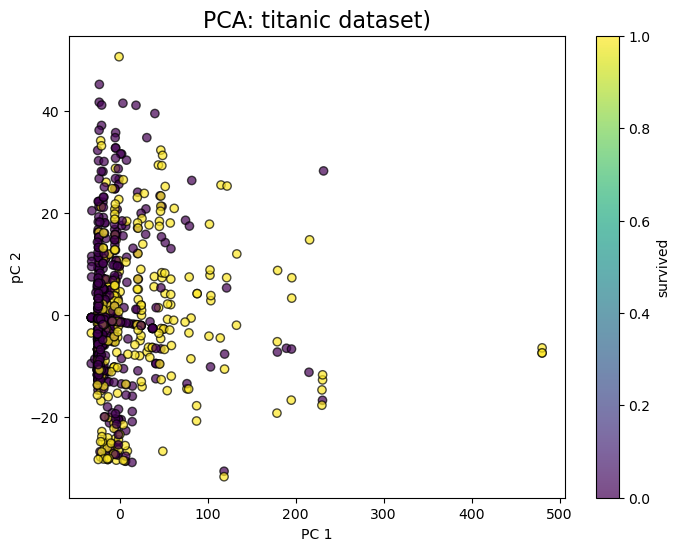

In [139]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA: titanic dataset)', fontsize=16)
plt.xlabel('PC 1')
plt.ylabel('pC 2')
plt.colorbar(label='survived')
plt.show()

## Question 5 : Implement the CNN Model

You are tasked with implementing a Convolutional Neural Network (CNN) model based on the structure shown below:



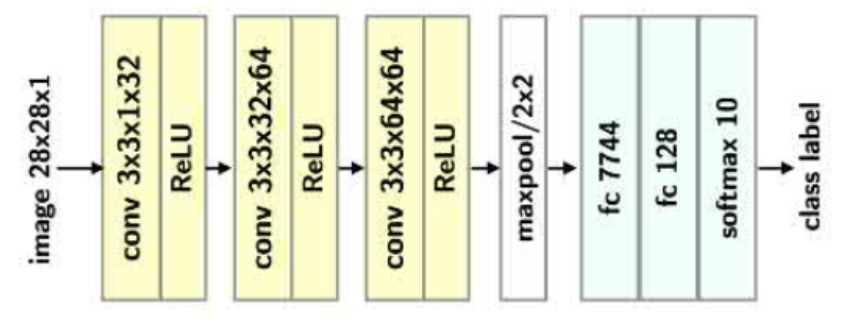

In [143]:
import pandas
import tensorflow as tf
import numpy as np
import sklearn
import skimage
import keras 
import torch

tf.random.set_seed(42)
np.random.seed(42)
# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

# Fill the missing gaps
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,794 (6.34 MB)

 Trainable params: 1,662,794 (6.34 MB)

 Non-trainable params: 0 (0.00 B)